In [1]:
!pip install wulffpack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 28.7 MB/s eta 0:00:00


In [2]:
from wulffpack import (SingleCrystal,
                       Decahedron,
                       Icosahedron)
from ase.build import bulk
from ase.io import write

/usr/local/lib/python3.11/dist-packages/wulffpack/core/geometry.py:151: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  for R in symmetry_data['rotations']:


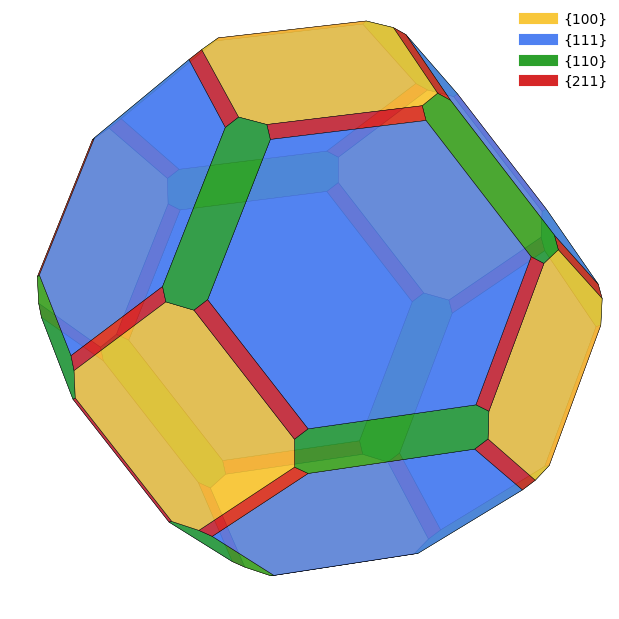

In [3]:
# 表面エネルギー(key:ミラー指数, value:表面エネルギー)
surface_energies = {(1, 0, 0): 1.1,
                    (1, 1, 1): 1.,
                    (1, 1, 0): 1.15,
                    (2, 1, 1): 1.14}
particle = SingleCrystal(surface_energies)
particle.view()

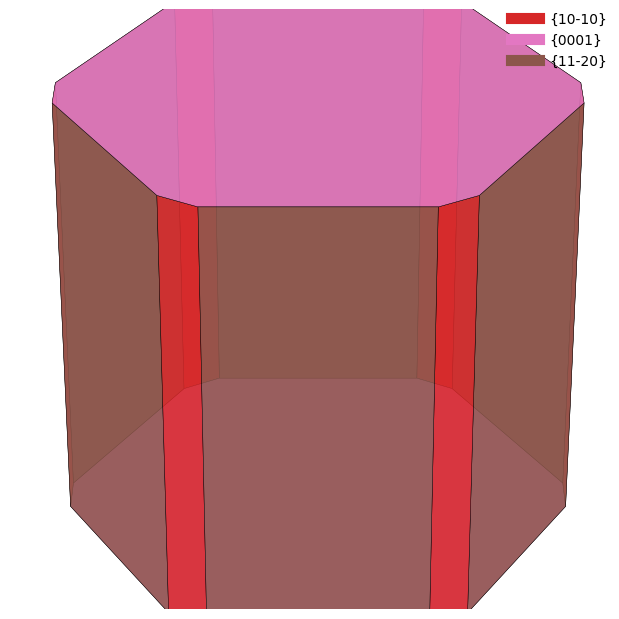

In [4]:
# 六方最密充填結晶
prim = bulk('Co', crystalstructure='hcp')
surface_energies = {(1, 0, -1, 0): 1.1,
                    (0, 0, 0, 1): 1.0,
                    (1, 1, -2, 0): 1.0}
particle = SingleCrystal(surface_energies,
                         primitive_structure=prim,
                         natoms=5000)
particle.view()

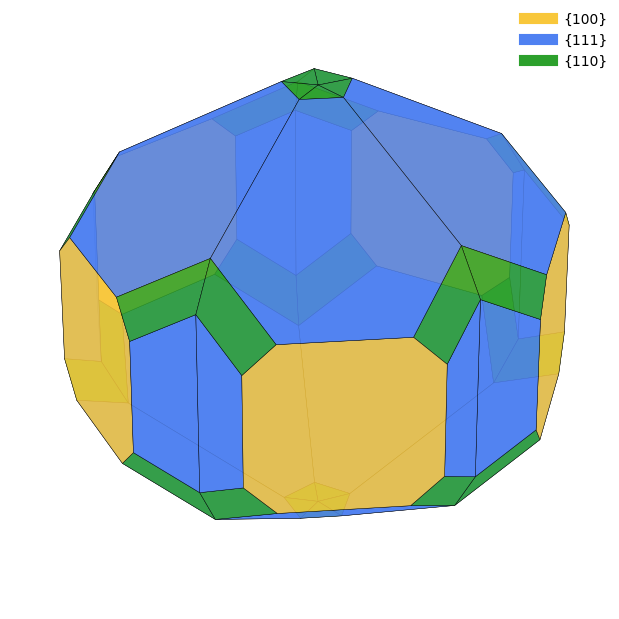

In [6]:
# 十面体粒子
surface_energies = {(1, 0, 0): 1.1,
                    (1, 1, 1): 1.,
                    (1, 1, 0): 1.15}
prim = bulk('Pd', a=3.9)
particle = Decahedron(surface_energies,
                      twin_energy=0.04,
                      primitive_structure=prim)
particle.view()

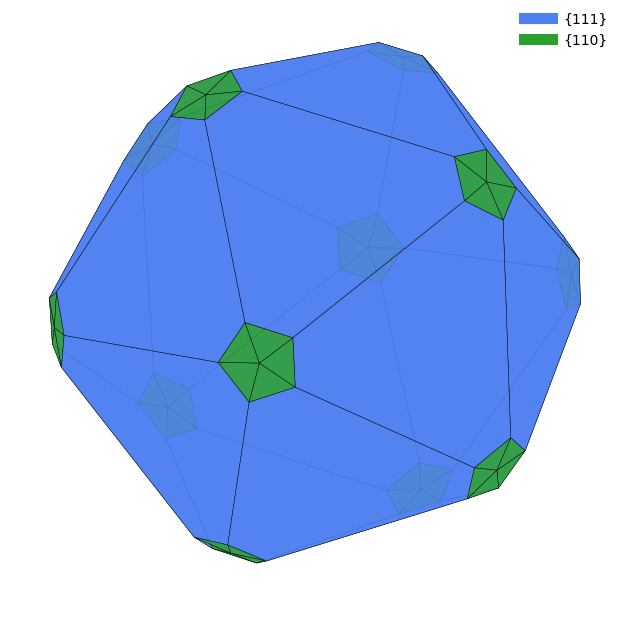

In [7]:
# 二十面体粒子
particle = Icosahedron(surface_energies,
                       twin_energy=0.04,
                       primitive_structure=prim)
particle.view()

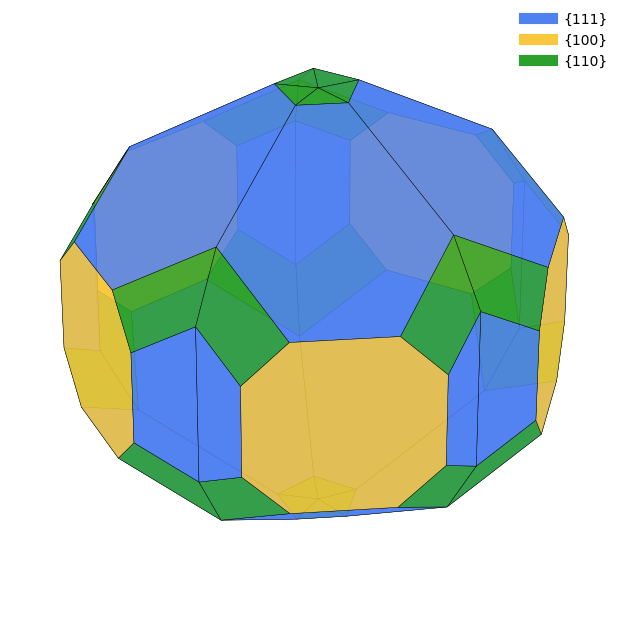

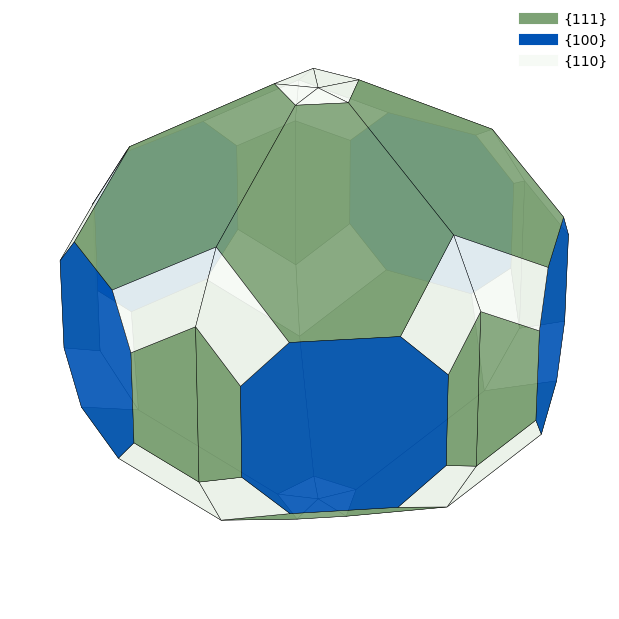

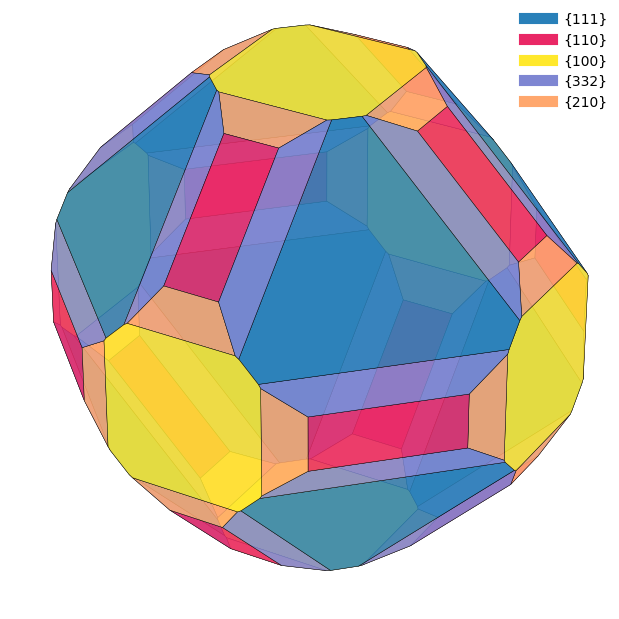

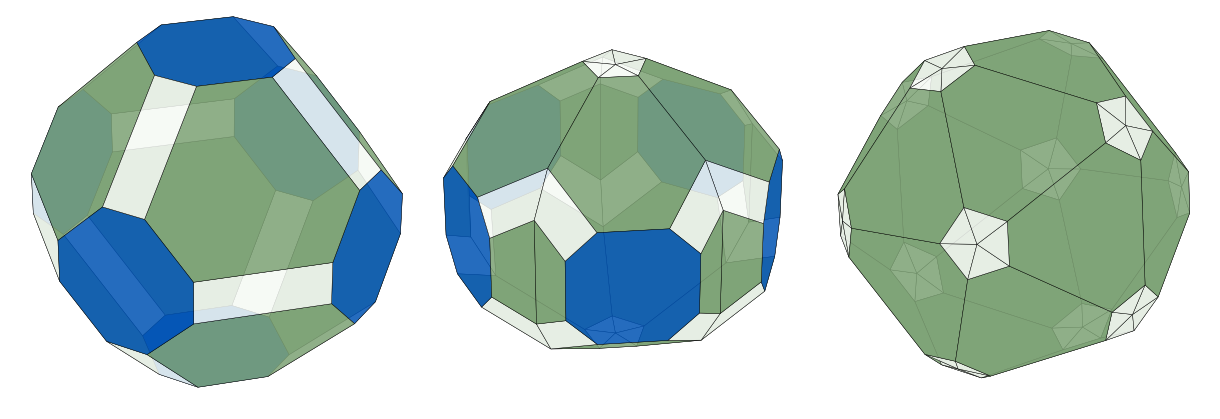

In [11]:
from wulffpack import (SingleCrystal,
                       Decahedron,
                       Icosahedron)

# Define energies and create particle
surface_energies = {(1, 1, 1): 1.0,
                    (1, 0, 0): 1.1,
                    (1, 1, 0): 1.12}
particle = Decahedron(surface_energies=surface_energies,
                      twin_energy=0.02)

# Define colors (optional)
colors = {(1, 1, 1): '#7da275',
          (1, 0, 0): '#0053b5',
          (1, 1, 0): '#f6faf5'}
# Show with GUI:
particle.view()
# Save as file:
particle.view(colors=colors, linewidth=0.3, alpha=0.9,
              save_as='single_particle.png')

# Use continuous color scheme
surface_energies_vicinal = {(1, 1, 1): 1.0,
                            (1, 1, 0): 1.1,
                            (1, 0, 0): 1.1,
                            (3, 3, 2): 1.05,
                            (2, 1, 0): 1.15}
particle_vicinal = SingleCrystal(surface_energies_vicinal)
continuous_colors = particle_vicinal.get_continuous_color_scheme()
particle_vicinal.view(colors=continuous_colors)

# Make figure with subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(3 * 4.0, 4.0))
ax = fig.add_subplot(131, projection='3d')
particle = SingleCrystal(surface_energies)
particle.make_plot(ax, colors=colors)

ax = fig.add_subplot(132, projection='3d')
particle = Decahedron(surface_energies,
                      twin_energy=0.05)
particle.make_plot(ax, colors=colors)

ax = fig.add_subplot(133, projection='3d')
particle = Icosahedron(surface_energies,
                       twin_energy=0.05)
particle.make_plot(ax, colors=colors)

plt.subplots_adjust(top=1, bottom=0, left=0,
                    right=1, wspace=0, hspace=0)
plt.savefig('particles.png')
plt.show()


# Use ase.visualize.view
from ase.visualize import view
view(particle.atoms)

# Write atoms to file for further visualization
from ase.io import write
write('atoms.xyz', particle.atoms)

# Write wavefront obj file
particle.write('particle.obj')